In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import caffe
caffe_root = '../' 

In [2]:
MODEL_FILE = caffe_root+'data/alex/places205CNN_deploy_upgraded.prototxt'
PRETRAINED = caffe_root+'data/alex/places205CNN_iter_300000_upgraded.caffemodel'
MEAN_FILE = caffe_root+'data/alex/places205CNN_mean.binaryproto'

In [3]:
imagenet_label_file = caffe_root + 'data/alex/categoryIndex_places205.csv'
labels = list(np.loadtxt(imagenet_label_file, str, delimiter='\,'))
assert len(labels) == 205
print( 'Loaded places205 labels:\n', '\n'.join(labels[:10] + ['...']))

Loaded places205 labels:
 /a/abbey 0
/a/airport_terminal 1
/a/alley 2
/a/amphitheater 3
/a/amusement_park 4
/a/aquarium 5
/a/aqueduct 6
/a/arch 7
/a/art_gallery 8
/a/art_studio 9
...


In [4]:
proto_data = open(MEAN_FILE, 'rb').read()
a = caffe.io.caffe_pb2.BlobProto.FromString(proto_data)
mean  = caffe.io.blobproto_to_array(a)[0]


In [5]:
caffe.set_mode_cpu()


In [6]:
net = caffe.Classifier(MODEL_FILE, PRETRAINED,
                       mean=mean,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))
print ("successfully loaded classifier")

successfully loaded classifier


/c/conference_room 51
/c/conference_center 50
/a/auditorium 12
/b/ballroom 15
/b/banquet_hall 17


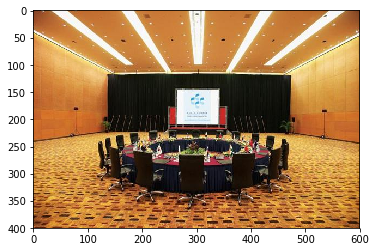

In [7]:
# download an image
#my_image_url = "http://places2.csail.mit.edu/imgs/2.jpg"  # paste your URL here
# for example:
# my_image_url = "https://upload.wikimedia.org/wikipedia/commons/b/be/Orang_Utan%2C_Semenggok_Forest_Reserve%2C_Sarawak%2C_Borneo%2C_Malaysia.JPG"
#!wget -O image.jpg $my_image_url

# transform it and copy it into the net
#input_image = caffe.io.load_image('image.jpg')
input_image = caffe.io.load_image(caffe_root+'data/alex/10.jpg')
# test on a image
#IMAGE_FILE = 'path/to/image/img.png'
#input_image = caffe.io.load_image(IMAGE_FILE)
# predict takes any number of images,
# and formats them for the Caffe net automatically
pred = net.predict([input_image])
net.forward()
output_prob = net.blobs['prob'].data[0]
top_inds = output_prob.argsort()[::-1][:5]

for i in top_inds: print (labels[i])
plt.imshow(input_image)


In [8]:
output_prob[top_inds],top_inds
for i in top_inds: print (labels[i])

/c/conference_room 51
/c/conference_center 50
/a/auditorium 12
/b/ballroom 15
/b/banquet_hall 17


In [9]:
'''
# download an image
my_image_url = "http://places2.csail.mit.edu/imgs/13.jpg"  # paste your URL here
# for example:
# my_image_url = "https://upload.wikimedia.org/wikipedia/commons/b/be/Orang_Utan%2C_Semenggok_Forest_Reserve%2C_Sarawak%2C_Borneo%2C_Malaysia.JPG"
!wget -O image.jpg $my_image_url

# transform it and copy it into the net
image = caffe.io.load_image('image.jpg')
#net.blobs['data'].data[...] = transformer.preprocess('data', image)

# perform classification
net.forward()

# obtain the output probabilities
output_prob = net.blobs['prob'].data[0]

# sort top five predictions from softmax output
top_inds = output_prob.argsort()[::-1][:5]

plt.imshow(image)

print ('probabilities and labels:')
zip(output_prob[top_inds], labels[top_inds])
'''

'\n# download an image\nmy_image_url = "http://places2.csail.mit.edu/imgs/13.jpg"  # paste your URL here\n# for example:\n# my_image_url = "https://upload.wikimedia.org/wikipedia/commons/b/be/Orang_Utan%2C_Semenggok_Forest_Reserve%2C_Sarawak%2C_Borneo%2C_Malaysia.JPG"\n!wget -O image.jpg $my_image_url\n\n# transform it and copy it into the net\nimage = caffe.io.load_image(\'image.jpg\')\n#net.blobs[\'data\'].data[...] = transformer.preprocess(\'data\', image)\n\n# perform classification\nnet.forward()\n\n# obtain the output probabilities\noutput_prob = net.blobs[\'prob\'].data[0]\n\n# sort top five predictions from softmax output\ntop_inds = output_prob.argsort()[::-1][:5]\n\nplt.imshow(image)\n\nprint (\'probabilities and labels:\')\nzip(output_prob[top_inds], labels[top_inds])\n'

In [10]:
len(pred[0]),pred

(205, array([[  7.06672722e-07,   6.39275604e-05,   7.67983408e-07,
           7.73427200e-06,   5.42174462e-07,   1.03187926e-06,
           1.38174372e-07,   6.14801684e-06,   3.03006182e-05,
           1.96508263e-05,   2.50932908e-06,   5.27940465e-05,
           9.85569954e-02,   2.61090605e-07,   3.77743596e-08,
           1.37645081e-01,   1.13519590e-07,   9.87163931e-02,
           4.13235975e-04,   9.39365691e-07,   1.13839284e-04,
           1.62787728e-06,   1.72895312e-07,   1.54890331e-05,
           6.23136657e-06,   5.41158954e-07,   4.10240364e-06,
           3.91274352e-06,   3.78966604e-07,   1.04361307e-05,
           2.92783511e-06,   3.86794954e-06,   2.79353969e-07,
           5.16028513e-06,   8.06492437e-07,   1.82981083e-07,
           1.45645765e-06,   2.70946679e-04,   1.44324804e-06,
           1.58982220e-06,   1.77823935e-07,   5.89752858e-07,
           1.45786464e-06,   4.59276271e-06,   2.11183424e-03,
           6.79345135e-07,   3.29333238e-06,   5.7

In [11]:
top_inds,output_prob[top_inds]

(array([51, 50, 12, 15, 17]),
 array([ 0.41086546,  0.29621962,  0.18488258,  0.07007287,  0.02392925], dtype=float32))